In [1]:
import numpy as np
import scipy.special as spc
import matplotlib.pyplot as plt

### Part A

In [2]:
def binomialLikelihood(prob, all_ins, pos_ins):
    return spc.comb(all_ins, pos_ins) * prob**(pos_ins) * (1.0-prob)**(all_ins - pos_ins)

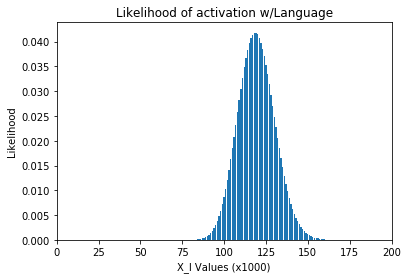

In [3]:
prob_list = np.arange(0.0,1.0,0.001)
xl_list = []
for pr in prob_list:
    xl_list.append(binomialLikelihood(pr,869,103))

index = np.arange(0,1000)
plt.xlim(0,200)  
plt.bar(index, xl_list)  
plt.xlabel('X_l Values (x1000)')  
plt.ylabel('Likelihood')  
plt.title('Likelihood of activation w/Language')  
plt.show()  



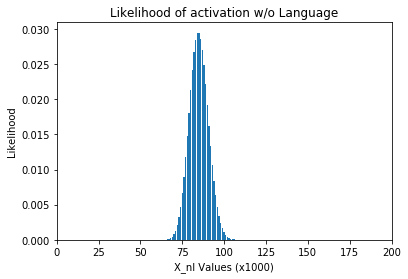

In [4]:
prob_list = np.arange(0.0,1.0,0.001)
xnl_list = []
for pr in prob_list:
    xnl_list.append(binomialLikelihood(pr,2353,199))

index = np.arange(0,1000)
plt.xlim(0,200)  
plt.bar(index, xnl_list)  
plt.xlabel('X_nl Values (x1000)')  
plt.ylabel('Likelihood')  
plt.title('Likelihood of activation w/o Language')  
plt.show()  


### Part B

In [5]:
print('Max Likelihood Estimate of P(act|X_l):', prob_list[np.argmax(xl_list)])
print('Max Likelihood Estimate of P(act|X_nl):', prob_list[np.argmax(xnl_list)])

Max Likelihood Estimate of P(act|X_l): 0.11900000000000001
Max Likelihood Estimate of P(act|X_nl): 0.085


### Part C

In [6]:
def posterior_distribution(prob, normalization_constant, all_ins, pos_ins):
    #assuming the prior distribution of a uniform distribution of 1.
    return (spc.comb(all_ins, pos_ins) * prob**(pos_ins) * (1.0-prob)**(all_ins - pos_ins)) / normalization_constant

def joint_distribution(pr,nor_1, all_1, pos_1, nor_2, all_2, pos_2):
    return posterior_distribution(pr,nor_1,all_1,pos_1) * posterior_distribution(pr,nor_2,all_2,pos_2)

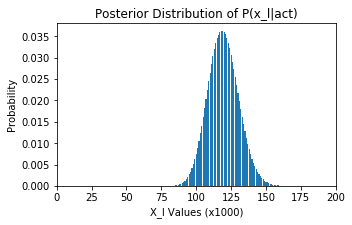

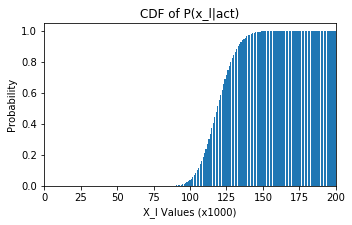

In [7]:
prob_list = np.arange(0.0,1.0,0.001)

sum_prob_xl = np.sum(xl_list)
sum_prob_xnl = np.sum(xnl_list)

sum = 0
cdf_xl = []
posterior_xl = []
for pr in prob_list:
    temp = posterior_distribution(pr,sum_prob_xl,869,103)
    sum += temp
    cdf_xl.append(sum)
    posterior_xl.append(posterior_distribution(pr,sum_prob_xl,869,103))

index = np.arange(0,1000)
plt.figure(figsize=(5,3))
plt.xlim(0,200)  
plt.bar(index, posterior_xl)  
plt.xlabel('X_l Values (x1000)')  
plt.ylabel('Probability')  
plt.title('Posterior Distribution of P(x_l|act)')  
plt.show()  

index = np.arange(0,1000)
plt.figure(figsize=(5.23,3))
plt.xlim(0,200)  
plt.bar(index, cdf_xl)  
plt.xlabel('X_l Values (x1000)')  
plt.ylabel('Probability')  
plt.title('CDF of P(x_l|act)')  
plt.show()  

In [10]:
print('Max Likelihood Estimate of P(act|x_l)', prob_list[np.argmax(posterior_xl)])

Max Likelihood Estimate of P(act|x_l) 0.11900000000000001


In [11]:
print('Max Likelihood Estimate of P(act|x_l)', prob_list[np.argmax(posterior_xnl)])

NameError: name 'posterior_xnl' is not defined

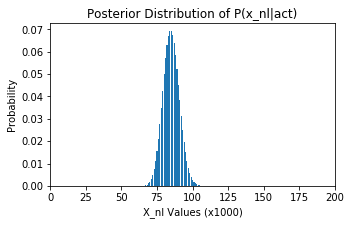

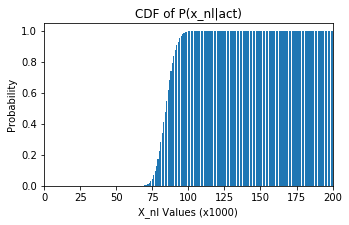

In [19]:
prob_list = np.arange(0.0,1.0,0.001)

sum_prob_xl = np.sum(xl_list)
sum_prob_xnl = np.sum(xnl_list)

sum = 0
cdf_xnl = []
posterior_xnl = []
for pr in prob_list:
    temp = posterior_distribution(pr,sum_prob_xnl,2353,199)
    sum += temp
    cdf_xnl.append(sum)
    posterior_xnl.append(temp)

index = np.arange(0,1000)
plt.figure(figsize=(5.1,3))
plt.xlim(0,200)  
plt.bar(index, posterior_xnl)  
plt.xlabel('X_nl Values (x1000)')  
plt.ylabel('Probability')   
plt.title('Posterior Distribution of P(x_nl|act)')  
plt.show()  


index = np.arange(0,1000)
plt.figure(figsize=(5.17,3))
plt.xlim(0,200)  
plt.bar(index, cdf_xnl)  
plt.xlabel('X_nl Values (x1000)')  
plt.ylabel('Probability') 
plt.title('CDF of P(x_nl|act)')  
plt.show()  

In [13]:
index_lower = np.argmin(np.abs(np.asarray(cdf_xl)-0.025))
index_upper = np.argmin(np.abs(np.asarray(cdf_xl)-0.975))
print('Lower Bound for X_l:',prob_list[index_lower])
print('Upper Bound for X_l:',prob_list[index_upper])

Lower Bound for X_l: 0.098
Upper Bound for X_l: 0.14100000000000001


In [14]:
index_lower = np.argmin(np.abs(np.asarray(cdf_xnl)-0.025))
index_upper = np.argmin(np.abs(np.asarray(cdf_xnl)-0.975))
print('Lower Bound for X_nl:',prob_list[index_lower])
print('Upper Bound for X_nl:',prob_list[index_upper])

Lower Bound for X_nl: 0.073
Upper Bound for X_nl: 0.096


### Part D

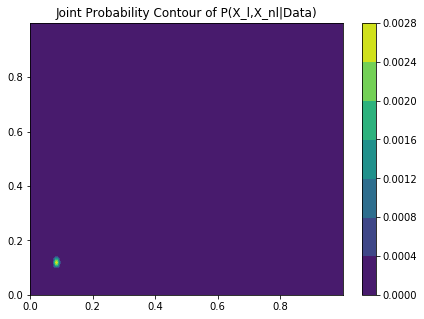

In [15]:
post_xl = np.asarray(posterior_xl).reshape((len(posterior_xl),1))
post_xnl = np.asarray(posterior_xnl).reshape((len(posterior_xnl),1)).T
outer_product = np.matmul(post_xl,post_xnl)

plt.figure(figsize=(7,5))
plt.contourf(prob_list, prob_list, outer_product)
plt.colorbar()
plt.title('Joint Probability Contour of P(X_l,X_nl|Data)')
plt.show()

In [16]:
sumBigger=0
sumLower=0
numRows = outer_product.shape[0]
numCols = outer_product.shape[1]

for x in range(numRows):
    for y in range(numCols):
        if x>y:
            sumBigger += outer_product[x,y] 
        else:
            sumLower += outer_product[x,y]
print('P(X_l>X_nl|Data) =',sumBigger)
print('P(X_l<=X_nl|Data) =',sumLower)

P(X_l>X_nl|Data) = 0.9978520275861242
P(X_l<=X_nl|Data) = 0.002147972413864103


In [17]:
print('Maximum Value of Marginal Distribution:', np.max(post_xl)*np.max(post_xnl))

Maximum Value of Marginal Distribution: 0.00252197445467609


### Part E

In [18]:
bayes_p = .119 * .5 / (.119 * .5 + .085 * .5)  
print(bayes_p)

0.5833333333333333
